# Muon Separator Voltage Signal Exploration Pre Capacitor

In this notebook we explore the raw voltage signal. This data was sampled with the frequencey at 1000Hz and the number of elements at 100 so the DAQ sent a packet of 100 readings to the IOC every 0.1 seconds. 

The aim is to see how noisy the data is and if their is a 50Hz component. The data was taken before a 0.1uF capacitor was fitted so will be extra noisy. More analysis will be need of data post fitting the capacitor.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

from src.data_processing import clean_data, create_data_from_entry

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Cleaning the data

The raw data takes the following form:

- Column 0: Time since EPOCH the reading was taken given by the python collection script `Muon-data-logger.py`.
- Column 1-100: Data from the `DAQ:_RAW` record. The readings are the DAQ voltage readings. These readings were requested every 0.05 seconds by the python script collecting the data from the IOC.

In [2]:
raw = pd.read_csv("..\\data\\raw\\muon_results.csv", nrows=36000, header=None)

Now we clean the data up by changing the datatime value to a timestamp, drop any rows with duplicate values and then reset the index.

In [3]:
signal = clean_data(raw)

In [4]:
signal.shape

(6885, 101)

So we have roughly 688.5 seconds of data.

In [5]:
signal.head()

,1,2,3,4,5,6,7,8,9,10,...,92,93,94,95,96,97,98,99,100,Datetime
0,4.518552,4.450329,4.418448,4.399958,4.232905,4.364889,4.349268,4.384018,4.372859,4.489223,...,4.583588,4.619294,4.657232,4.733744,4.664564,4.699314,4.683055,4.667433,4.580400,2018-09-21 16:56:48.930999994
1,4.662333,4.594428,4.530986,4.521740,4.437258,4.376048,4.420680,4.308780,4.335241,4.349268,...,4.443634,4.479021,4.523972,4.572749,4.621207,4.601122,4.675722,4.678910,4.640973,2018-09-21 16:56:49.041000128
2,4.574343,4.545651,4.414623,4.446503,4.410478,4.276900,4.364252,4.322807,4.329821,4.408565,...,4.487310,4.581038,4.601760,4.649262,4.719398,4.696445,4.677954,4.710791,4.597616,2018-09-21 16:56:49.367999792
3,4.467225,4.557128,4.540231,4.637466,4.605267,4.711109,4.667433,4.705371,4.678273,4.630452,...,4.495280,4.479658,4.398364,4.403146,4.286783,4.359789,4.301766,4.342573,4.410478,2018-09-21 16:56:49.640000105
4,4.386568,4.472645,4.553302,4.616744,4.628539,4.760205,4.666477,4.698039,4.673172,4.654681,...,4.534811,4.435664,4.408565,4.401552,4.286145,4.342892,4.349268,4.333966,4.378279,2018-09-21 16:56:49.912999868




## Visualizing the data

First we plot the first element (column 1) of each row againist the time it was collected.

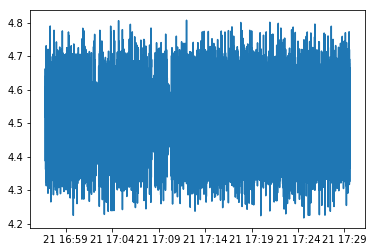

In [6]:
plt.plot(signal["Datetime"], signal[1])

Plotting the first 100 samples from the first column gives us a more 

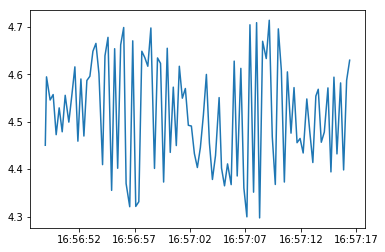

In [7]:
plt.plot(signal["Datetime"][:100], signal.iloc[:100, 1])

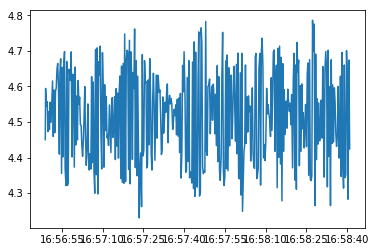

In [8]:
plt.plot(signal["Datetime"][:400], signal.iloc[:400, 1])

Lets look at the seond tenth of a second of data

In [ ]:
second_tenth_second = create_data_from_entry(1, signal)
second_tenth_second.head()

In [ ]:
second_tenth_second.tail()

In [ ]:
plt.plot(second_tenth_second["Datetime"], second_tenth_second["Value"])

In [ ]:
two_tenths_of_seconds = pd.concat([first_tenth_second, second_tenth_second])
plt.plot(two_tenths_of_seconds["Datetime"], two_tenths_of_seconds["Value"])

It looks like the signal has a 50Hz componenet but the frequency does seem to change.